In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import seaborn as sns

#getting csvs
song_data = pd.read_csv("song_data.csv")
song_info = pd.read_csv("song_info.csv")

In [24]:
#merge 2 files to get a full data set
total_data = pd.merge(song_data, song_info, left_index=True, right_index=True)
total_data.head()
#total_data["song_name_x"].value_counts()

,song_name_x,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_name_y,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [29]:
#basic cleaning of the merged dataframe, removing unnecessary columns
new_data = total_data.drop("album_names",1)
new_data = new_data.drop("playlist",1)
new_data = new_data.drop("song_name_y",1)
new_data = new_data.rename(columns={"song_name_x":"song_name"})
new_data.head()
#removing duplicate values to get 
b = pd.DataFrame(new_data)
b_clean = DataFrame.drop_duplicates(b)
b_clean.sort_values("song_popularity")

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name
17604,Make It Back,0,102560,0.122000,0.750,0.387,0.000000,1,0.0993,-10.123,0,0.4870,143.019,4,0.739,Juice WRLD
14349,Choco / Mog,0,120000,0.572000,0.690,0.731,0.458000,4,0.2420,-5.473,0,0.1870,82.017,4,0.703,Devonwho
4234,Como Deseo Ser Tu Amor,0,227160,0.372000,0.511,0.405,0.000262,9,0.1510,-10.254,1,0.0366,89.841,4,0.459,Los Galos
9394,Down and Out,0,200306,0.001270,0.562,0.698,0.001890,9,0.1460,-5.956,0,0.0439,119.971,4,0.375,The Griswolds
9389,Heartbreaker,0,300663,0.126000,0.373,0.906,0.001230,8,0.1430,-6.750,0,0.0893,110.007,4,0.488,Daniel Wilson
9383,Life's A Bitch - Explicit Album Version,0,209306,0.001190,0.810,0.500,0.000000,2,0.1140,-11.823,1,0.2650,90.036,4,0.336,Nas
9373,Represent - Explicit Album Version,0,252560,0.029700,0.759,0.693,0.000012,11,0.1280,-9.036,1,0.3050,92.771,4,0.698,Nas
9437,Postcard,0,210306,0.116000,0.691,0.739,0.000000,0,0.1560,-5.453,1,0.0301,115.024,4,0.492,Jukebox The Ghost
9362,Killa Cam,0,251453,0.010400,0.670,0.788,0.000000,11,0.4920,-7.426,1,0.2740,80.032,4,0.522,Cam’ron
9339,G Season (feat. Meek Mill),0,237013,0.013700,0.662,0.708,0.000000,1,0.2440,-4.910,1,0.1320,110.602,5,0.446,T.I.


In [47]:
new_data.head()
grouped = new_data.groupby("artist_name").mean()
grouped = grouped.sort_values("song_popularity",ascending = False)
grouped.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
artist_name,,,,,,,,,,,,,,
Dynoro,97.000000,184560.000000,0.176000,0.694000,0.770000,0.000011,6.000000,0.118000,-5.335000,1.000000,0.149000,125.905000,4.0,0.163000
benny blanco,95.727273,173726.727273,0.569182,0.571727,0.662818,0.000000,6.272727,0.121091,-7.502000,0.090909,0.294700,89.447364,4.0,0.368909
Nio Garcia,94.000000,417920.000000,0.542000,0.903000,0.675000,0.000013,11.000000,0.059500,-3.445000,0.000000,0.214000,96.507000,4.0,0.442000
6ix9ine,92.177778,177518.511111,0.113324,0.792778,0.587711,0.000000,4.111111,0.144213,-6.366667,0.955556,0.326800,130.050756,4.0,0.499000
Bad Bunny,91.500000,210108.318182,0.090336,0.820409,0.573364,0.000589,5.545455,0.104032,-6.013000,0.090909,0.076464,99.788682,4.0,0.260727


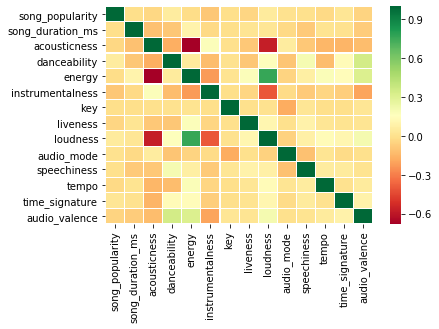

In [53]:
#Creating a correlation matrix to see if there're any obvious correlations
corr = b_clean.corr()
corr.style.background_gradient(cmap='PuOr').set_precision(2)
ax = sns.heatmap(corr,  linewidth=0.1, cmap="RdYlGn")
#plt.matshow(b_clean.corr())
#c_clean = b_clean.sort_values("song_popularity", ascending = False)
#c_clean.head()
#c_clean=c_clean[c_clean.duplicated(subset="song_popularity",keep="first")].reset_index(drop="index")
#c_clean

Text(0, 0.5, 'Energy')

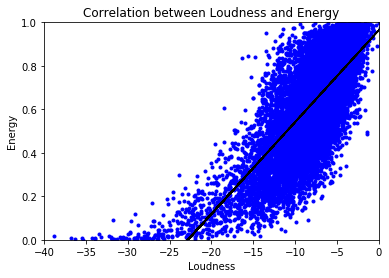

In [7]:
#energy and loudness seem to have 0.76 correlation above
#get correlations between LOUDNESS and ENERGY
x = b_clean["loudness"].values
y = b_clean["energy"].values

#x=x.reshape(x.shape[0],1)
#y=y.reshape(y.shape[0],1)

#plt.scatter(x,y)

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)

plt.plot(x,y,"b.",x,fit_fn(x),'--k')
plt.xlim(-40,0)
plt.ylim(0,1)

plt.title("Correlation between Loudness and Energy")
plt.xlabel("Loudness")
plt.ylabel("Energy")
#axes=plt.gca()
#m, b = np.polyfit(x,y,1)
#X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
#plt.plot(X_plot,m*X_plot + b,'y-')



Text(0, 0.5, 'Energy')

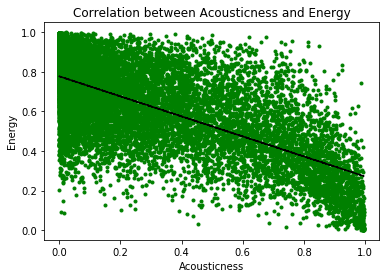

In [8]:
#correlations between ENERGY and ACOUSTICNESS
x = b_clean["acousticness"].values
y = b_clean["energy"].values

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)

plt.plot(x,y,"g.",x,fit_fn(x),'--k')
#plt.xlim(-40,0)
#plt.ylim(0,1)

plt.title("Correlation between Acousticness and Energy")
plt.xlabel("Acousticness")
plt.ylabel("Energy")

Text(0, 0.5, 'Loudness')

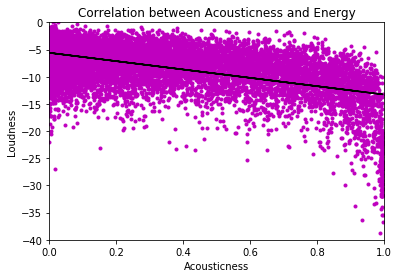

In [13]:
#correlations between LOUDNESS and ACOUSTICNESS
x = b_clean["acousticness"].values
y = b_clean["loudness"].values

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)

plt.plot(x,y,"m.",x,fit_fn(x),'-k')
plt.xlim(0,1)
plt.ylim(-40,0)

plt.title("Correlation between Acousticness and Energy")
plt.xlabel("Acousticness")
plt.ylabel("Loudness")